In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.vector import gradient

from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

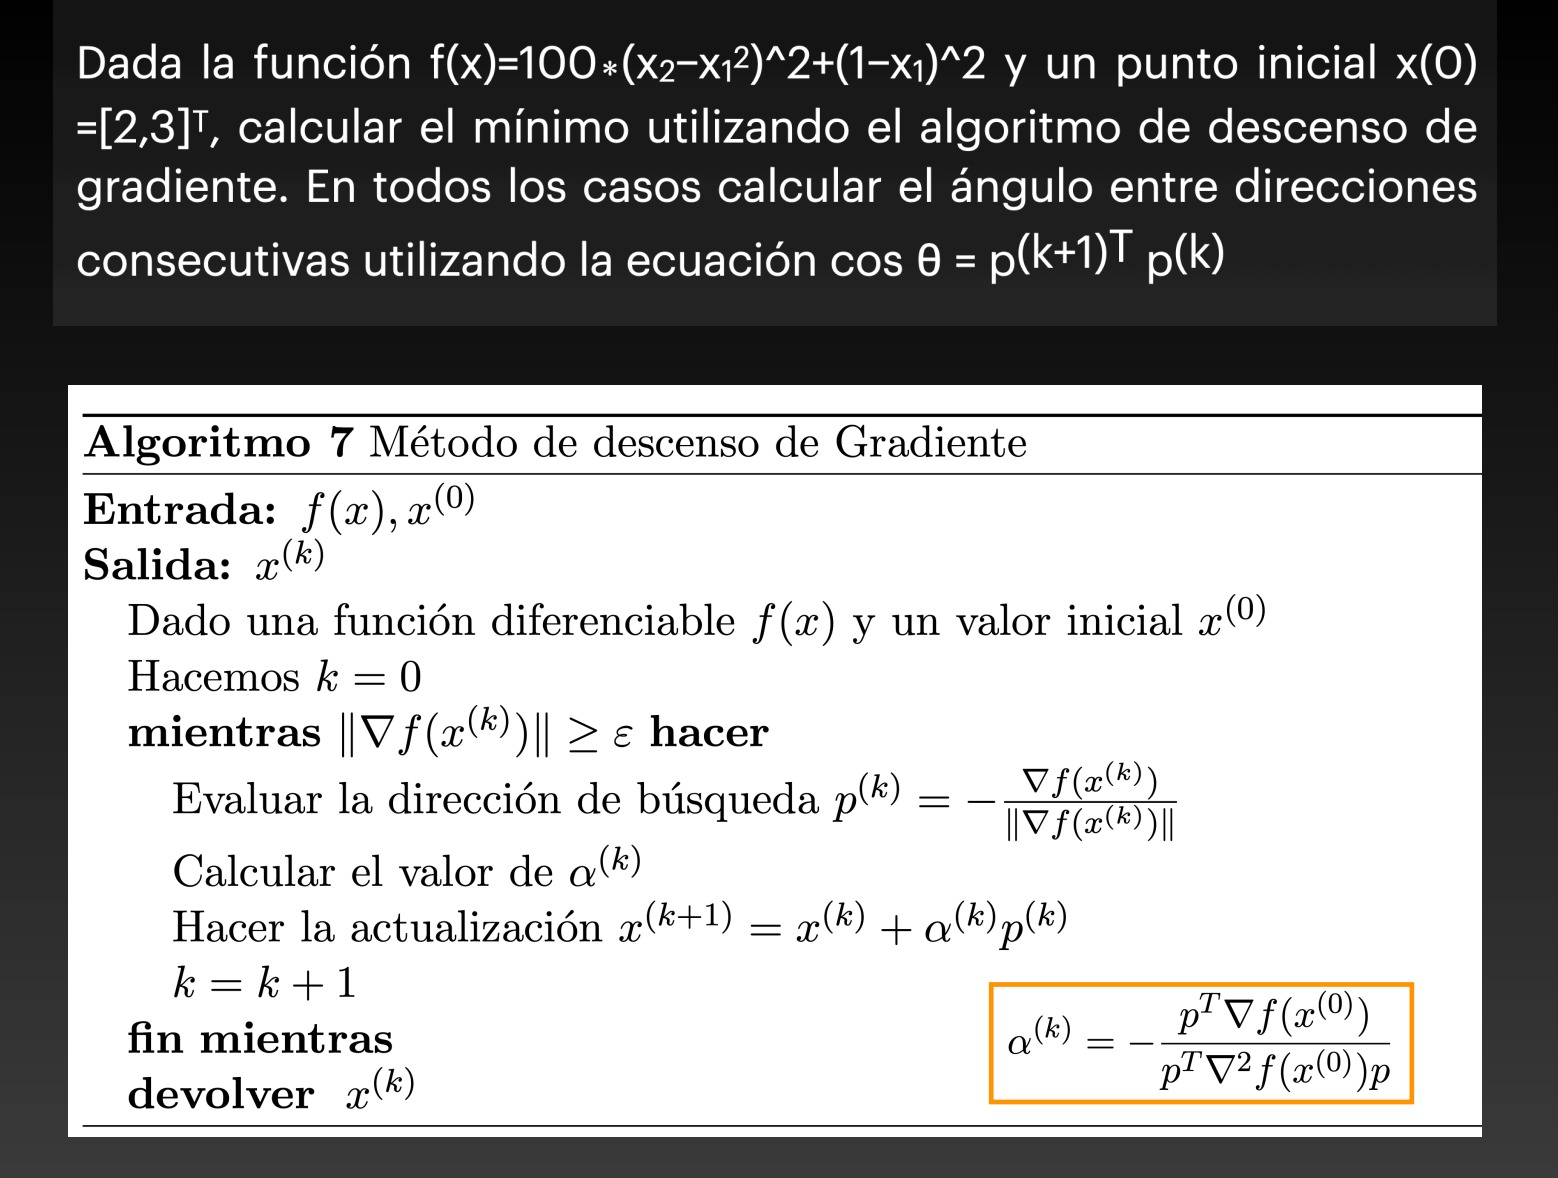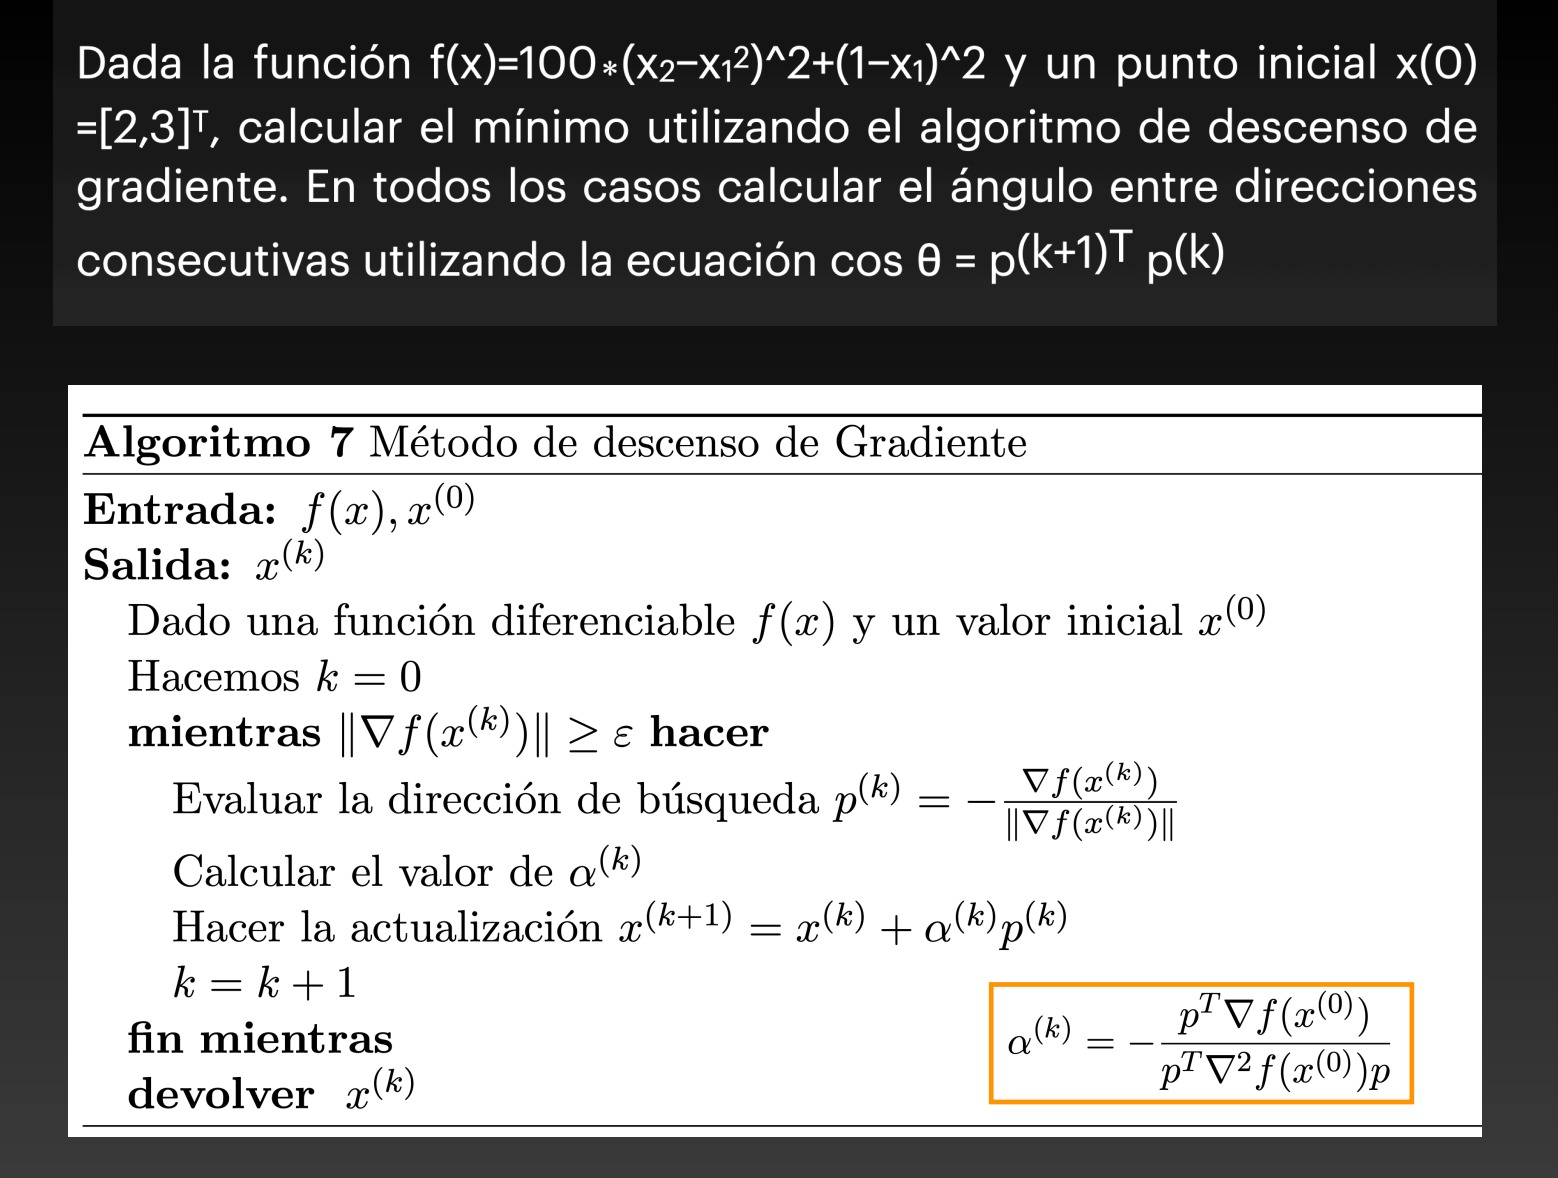

Vamos a aplicar el descenso del gradiente a la función $$f(x_1,x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$$

Con $X=(x_1,x_2)$.

Primero vamos a obtener las derivadas utilizando sympy.



In [39]:
# Definir las variables simbólicas
x1, x2 = sp.symbols('x1 x2')

# Definir la función f(x1, x2)
f = 100*(x2 - x1**2)**2 + (1-x1)**2

# Calcular la matriz hessiana
H = sp.hessian(f, (x1, x2))

# Imprimir la matriz hessiana
print("Matriz Hessiana:")
H

Matriz Hessiana:


Matrix([
[1200*x1**2 - 400*x2 + 2, -400*x1],
[                -400*x1,     200]])

Ahora para pasar esta matriz a una expresión funcional vamos a usar $\texttt{lambdify(variables, expression, modules='numpy')}$

La función $\texttt{lambdify()}$ en SymPy se utiliza para convertir expresiones simbólicas en funciones numéricas que se pueden evaluar de manera eficiente. Esta conversión es útil cuando deseas evaluar expresiones simbólicas en puntos específicos o realizar cálculos numéricos con ellas en lugar de mantenerlas en forma simbólica. $\texttt{lambdify()}$ genera una función de Python que puede tomar valores numéricos como entrada y producir resultados numéricos.

La sintaxis básica de $\texttt{lambdify()}$ es la siguiente:



*  $\texttt{variables}$: Una o una lista de variables simbólicas que aparecen en la expresión que deseas convertir en una función.
* $\texttt{expression}$: La expresión simbólica que deseas convertir en una función.
* $\texttt{modules}$ (opcional): La biblioteca a utilizar para la función resultante. Por defecto, se utiliza 'numpy', lo que permite realizar operaciones numéricas eficientes. También puedes utilizar 'math' u otras bibliotecas numéricas compatibles.


La función $\texttt{lambdify()}$ devuelve una función de Python que puede utilizar para evaluar la expresión en valores numéricos. Esta función generada es mucho más eficiente que la evaluación directa de una expresión simbólica en un bucle, por ejemplo.

In [40]:
HF = sp.lambdify((x1, x2), H, 'numpy') #Hessiana

In [41]:
# 1. Calcualar el gradiente unitario pk
Dx1 = sp.diff(f, x1)
Dx2 = sp.diff(f, x2)

grad= sp.lambdify((x1, x2),sp.Matrix([Dx1, Dx2]), 'numpy')
pk = sp.lambdify((x1, x2),sp.Matrix([Dx1/(Dx1**2+Dx2**2)**0.5, Dx2/(Dx1**2+Dx2**2)**0.5]), 'numpy') #Gradiente unitario

In [42]:
grad(3,5)

array([[4804],
       [-800]])

In [43]:
x1,x2 = 5,-3
alpha = lambda x1,x2: -np.dot(pk(x1,x2).T, grad(x1,x2)) / np.dot(pk(x1,x2).T, np.dot(HF(x1,x2), pk(x1,x2)))

In [44]:
alpha(x1,x2).item()

-1.7988254472840952

In [45]:
np.array([[x1,x2]]).shape

(1, 2)

In [46]:
 n=alpha(x1,x2).item()*pk(x1,x2).reshape(2)

In [47]:
# 2. Hacemos el loop
x1,x2 = 5,-3
tol = 1e-3
epocas = 1000
direcciones=[]
xk = []

j=0
while True:
    xk.append(np.array([x1,x2]))
    n=alpha(x1,x2).item()*pk(x1,x2).reshape(2)
    direcciones.append(pk(x1,x2).reshape(2))
    x1,x2 = [x1,x2] + n
    
    if np.linalg.norm(grad(x1,x2)) <= tol:
        print('Se ha alcanzado la tolerancia')
        break
    if j>=epocas:
        print('Se ha excedido el número de épocas')
        break
    j=j+1


Se ha alcanzado la tolerancia


In [48]:
[x1,x2]

[0.9989773450734539, 0.9979517596224616]

In [13]:
np.arccos(np.dot(direcciones[10],direcciones[9]))

1.5701849763453324

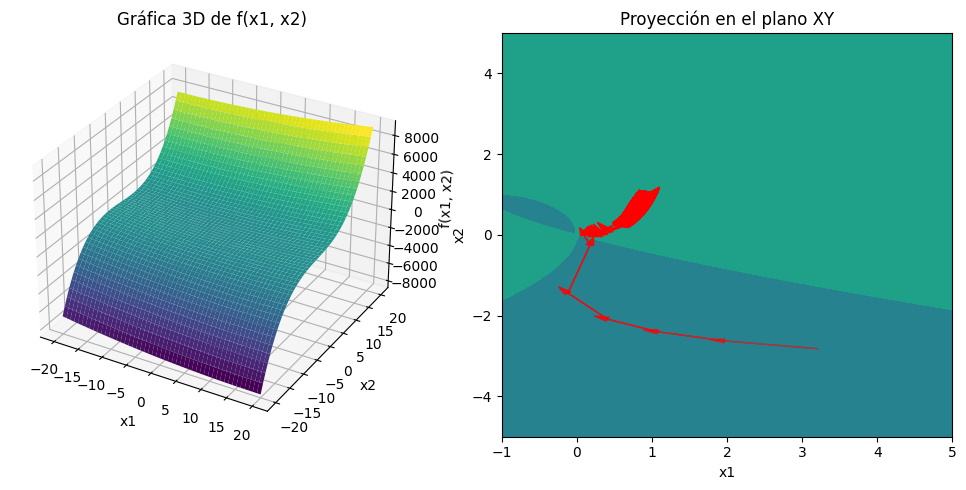

In [84]:
# Definir la función f(x1, x2)
def f(x1, x2):
    return x1**2 + 2*x1*x2 + x2**3

# Crear una malla de puntos en el dominio
x1_range = np.linspace(-20, 20, 500)
x2_range = np.linspace(-20, 20, 500)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
f_mesh = f(x1_mesh, x2_mesh)

# Crear una figura 3D
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Graficar la superficie de la función f(x1, x2) en 3D
ax1.plot_surface(x1_mesh, x2_mesh, f_mesh, cmap='viridis')

# Configurar etiquetas y título del gráfico 3D
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
ax1.set_title('Gráfica 3D de f(x1, x2)')

# Graficar la proyección en el plano XY
contour = ax2.contourf(x1_mesh, x2_mesh, f_mesh, cmap='viridis')
for k in range(len(direcciones)-1):
#for k in range(3):
    # ax.arrow(0, 0, xk[k][0], xk[k][1], 
    #          head_width=0.1, head_length=0.2, fc='red', ec='red', alpha = 1-1/(k+1))
    
    ax2.arrow(xk[k][0], xk[k][1], xk[k+1][0]-xk[k][0], xk[k+1][1]-xk[k][1], 
             head_width=0.1, head_length=0.2, fc='red', ec='red', alpha = 1-1/(k+1), label='pk')
    ax2.set_xlim(-1,5)
    ax2.set_ylim(-5,5)

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

ax2.set_title('Proyección en el plano XY')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [50]:
xk[0]

array([ 5, -3])

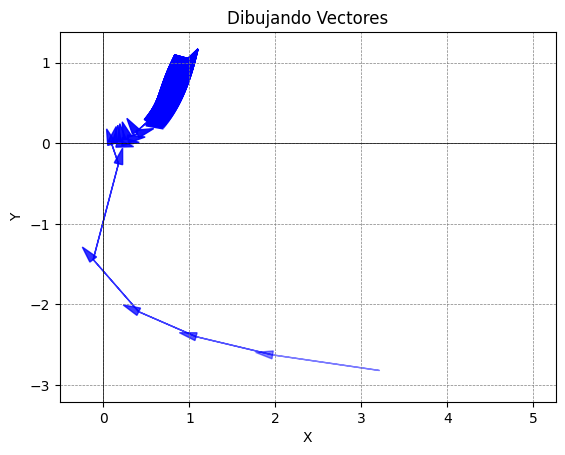

In [73]:

# Lista de direcciones (vectores) como listas [x, y]
#direcciones = [[1, 2], [-2, 1], [0, -1], [1, 0.5]]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Configurar límites del gráfico
#ax.set_xlim(-4, 4)
#ax.set_ylim(-4, 2)

# Dibujar cada vector como una flecha
for k in range(len(direcciones)-1):
#for k in range(3):
    # ax.arrow(0, 0, xk[k][0], xk[k][1], 
    #          head_width=0.1, head_length=0.2, fc='red', ec='red', alpha = 1-1/(k+1))
    
    ax.arrow(xk[k][0], xk[k][1], xk[k+1][0]-xk[k][0], xk[k+1][1]-xk[k][1], 
             head_width=0.1, head_length=0.2, fc='blue', ec='blue', alpha = 1-1/(k+1), label='pk')
    
    #ax.arrow(xk[k][0], xk[k][1], xk[k][0] + direcciones[k][0], xk[k][1] + direcciones[k][1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')

# Configurar ejes
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Dibujando Vectores')

# Mostrar el gráfico
#plt.legend()
plt.show()

**Para comprobar que nuestro método es correcto utilizamos una función pre definida de scipy:**

In [14]:
direcciones[0]

array([ 0.9950386 , -0.09948965])

In [15]:
np.dot(direcciones[10],direcciones[9])

0.0006113504114823171

In [18]:
def F(X):
    return 100*(X[1] - X[0]**2)**2 + (1-X[0])**2
minimize(F, [4,5])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.958453429285885e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 49
      jac: [-9.218e-08  9.896e-08]
 hess_inv: [[ 4.998e-01  9.999e-01]
            [ 9.999e-01  2.005e+00]]
     nfev: 192
     njev: 64